In [1]:
#importing and installing required libraries and packages
!pip install requests==2.26.0
!pip install lxml==4.6.4
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [463]:
#Importing the semi-structured html data from the below link using beautiful soup
url="https://markets.financialcontent.com/stocks/quote/historical?Month=11&Range=12&Year=2022&Symbol=537%3A1413346"
type(url)

str

In [464]:
#The get() method sends a GET request to the specified url.
data = requests.get(url).text

In [465]:
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
soup = BeautifulSoup(data, 'lxml')
#Checking the type of the data
type(soup)

bs4.BeautifulSoup

In [466]:
#Accessing the title of the page to check if the data is loaded and accessed properly.
soup.title.string

'Netflix Stock Price History |  Historical NFLX Company Stock Prices | FinancialContent Business Page '

In [467]:
from pprint import pprint

#It finds the elements with body tag and all the elements with tr tag inside body tag.
anchors = soup.find('body').find_all('tr')

#Printing the list of data
pprint(anchors)

[<tr>
<th class="first">Date</th>
<th>Open</th>
<th>High</th>
<th>Low</th>
<th>Close</th>
<th>Volume</th>
<th class="last">Change (%)</th>
</tr>,
 <tr>
<td class="first">Nov 18, 2022</td>
<td>297.33</td>
<td>298.00</td>
<td>287.00</td>
<td>287.98</td>
<td>8,400,157</td>
<td class="last negative change_negative">-7.30(-2.47%)</td>
</tr>,
 <tr>
<td class="first">Nov 17, 2022</td>
<td>294.72</td>
<td>299.82</td>
<td>291.00</td>
<td>295.28</td>
<td>9,806,845</td>
<td class="last negative change_negative">-10.74(-3.51%)</td>
</tr>,
 <tr>
<td class="first">Nov 16, 2022</td>
<td>309.94</td>
<td>310.49</td>
<td>303.61</td>
<td>306.02</td>
<td>8,034,157</td>
<td class="last negative change_negative">-4.18(-1.35%)</td>
</tr>,
 <tr>
<td class="first">Nov 15, 2022</td>
<td>309.20</td>
<td>312.71</td>
<td>302.55</td>
<td>310.20</td>
<td>14,609,634</td>
<td class="last positive change_positive">+10.93(+3.65%)</td>
</tr>,
 <tr>
<td class="first">Nov 14, 2022</td>
<td>290.00</td>
<td>311.00</td>
<td>2

In [468]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row

#Define the column headers of our table dataset.
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in anchors[1:]:
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    volume = col[5].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Volume":volume}, ignore_index=True)    

In [469]:
#Checking the data
netflix_data.head(10)

,Date,Open,High,Low,Close,Volume
0,"Nov 18, 2022",297.33,298.00,287.00,287.98,"8,400,157"
1,"Nov 17, 2022",294.72,299.82,291.00,295.28,"9,806,845"
2,"Nov 16, 2022",309.94,310.49,303.61,306.02,"8,034,157"
3,"Nov 15, 2022",309.20,312.71,302.55,310.20,"14,609,634"
4,"Nov 14, 2022",290.00,311.00,288.19,299.27,"17,978,520"
5,"Nov 11, 2022",274.47,290.66,271.56,290.13,"9,573,834"
6,"Nov 10, 2022",265.99,275.36,260.09,274.97,"9,656,846"
7,"Nov 09, 2022",259.66,260.90,254.22,254.66,"7,259,638"
8,"Nov 08, 2022",259.92,266.08,256.88,263.46,"7,664,379"
9,"Nov 07, 2022",261.06,261.15,252.09,258.60,"7,919,586"


In [435]:
netflix_data.info()
#The info() method prints information about the DataFrame. 
#The information contains the number of columns, column labels, column data types, memory usage, 
#range index, and the number of cells in each column (non-null values).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    244 non-null    object
 1   Open    244 non-null    object
 2   High    244 non-null    object
 3   Low     244 non-null    object
 4   Close   244 non-null    object
 5   Volume  244 non-null    object
dtypes: object(6)
memory usage: 11.6+ KB


In [470]:
#Cleaning & Formatting the data

#Since all the column are string type we need to remove all the character, symbols and then convert all
#columns to int/float type.
netflix_data['Volume']=netflix_data['Volume'].apply(lambda x:x.replace(',',''))
netflix_data['Volume']=netflix_data['Volume'].apply(lambda x:int(x))
netflix_data['Open'] = pd.to_numeric(netflix_data['Open'])
netflix_data['High'] = pd.to_numeric(netflix_data['High'])
netflix_data['Low'] = pd.to_numeric(netflix_data['Low'])
netflix_data['Close'] = pd.to_numeric(netflix_data['Close'])





In [471]:
#Again checking the dtpes
netflix_data.info()

#We can see that all required columns have been changed to float or int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    244 non-null    object 
 1   Open    242 non-null    float64
 2   High    239 non-null    float64
 3   Low     241 non-null    float64
 4   Close   244 non-null    float64
 5   Volume  244 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.6+ KB


In [472]:
netflix_data.head()
#Checking if the unnecessary details are removed from the data such as $, commas, if any.

,Date,Open,High,Low,Close,Volume
0,"Nov 18, 2022",297.33,298.00,287.00,287.98,8400157
1,"Nov 17, 2022",294.72,299.82,291.00,295.28,9806845
2,"Nov 16, 2022",309.94,310.49,303.61,306.02,8034157
3,"Nov 15, 2022",309.20,312.71,302.55,310.20,14609634
4,"Nov 14, 2022",290.00,311.00,288.19,299.27,17978520


In [473]:
#Now checking the Null values in all the columns.
netflix_data.isna().sum()

Date      0
Open      2
High      5
Low       3
Close     0
Volume    0
dtype: int64

In [474]:
#Dropping all the rows with Null values
netflix_data.dropna(inplace = True)
netflix_data = netflix_data.reset_index(drop=True)

In [475]:
#Rechecking the null values
netflix_data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [476]:
netflix_data

,Date,Open,High,Low,Close,Volume
0,"Nov 18, 2022",297.33,298.00,287.00,287.98,8400157
1,"Nov 17, 2022",294.72,299.82,291.00,295.28,9806845
2,"Nov 16, 2022",309.94,310.49,303.61,306.02,8034157
3,"Nov 15, 2022",309.20,312.71,302.55,310.20,14609634
4,"Nov 14, 2022",290.00,311.00,288.19,299.27,17978520
...,...,...,...,...,...,...
234,"Dec 08, 2021",630.00,632.46,623.20,628.08,2219191
235,"Dec 07, 2021",619.83,628.89,611.40,622.30,3124069
236,"Dec 06, 2021",606.01,617.29,601.00,612.24,3088557
237,"Dec 03, 2021",622.75,625.50,594.00,600.51,4829388


In [477]:
#Here the date is saved as object string
netflix_data['Date']

0      Nov 18, 2022
1      Nov 17, 2022
2      Nov 16, 2022
3      Nov 15, 2022
4      Nov 14, 2022
           ...     
234    Dec 08, 2021
235    Dec 07, 2021
236    Dec 06, 2021
237    Dec 03, 2021
238    Dec 02, 2021
Name: Date, Length: 239, dtype: object

In [478]:
#Using pandas function convert the object string to datetime format
netflix_data['Date'] = pd.to_datetime(netflix_data['Date'])

In [479]:
#Successfully converted release_data to datetime
netflix_data['Date']

0     2022-11-18
1     2022-11-17
2     2022-11-16
3     2022-11-15
4     2022-11-14
         ...    
234   2021-12-08
235   2021-12-07
236   2021-12-06
237   2021-12-03
238   2021-12-02
Name: Date, Length: 239, dtype: datetime64[ns]

In [480]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume
0,2022-11-18,297.33,298.00,287.00,287.98,8400157
1,2022-11-17,294.72,299.82,291.00,295.28,9806845
2,2022-11-16,309.94,310.49,303.61,306.02,8034157
3,2022-11-15,309.20,312.71,302.55,310.20,14609634
4,2022-11-14,290.00,311.00,288.19,299.27,17978520


In [481]:
#Now, creating a separate year column and concatinating the Year from Date into a new year column.
netflix_data['Year'] = netflix_data['Date'].dt.year
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Year
0,2022-11-18,297.33,298.00,287.00,287.98,8400157,2022
1,2022-11-17,294.72,299.82,291.00,295.28,9806845,2022
2,2022-11-16,309.94,310.49,303.61,306.02,8034157,2022
3,2022-11-15,309.20,312.71,302.55,310.20,14609634,2022
4,2022-11-14,290.00,311.00,288.19,299.27,17978520,2022


In [485]:
#Similarly for month
netflix_data['Month'] = netflix_data['Date'].dt.month
netflix_data.head()


,Date,Open,High,Low,Close,Volume,Year,Month
0,2022-11-18,297.33,298.00,287.00,287.98,8400157,2022,11
1,2022-11-17,294.72,299.82,291.00,295.28,9806845,2022,11
2,2022-11-16,309.94,310.49,303.61,306.02,8034157,2022,11
3,2022-11-15,309.20,312.71,302.55,310.20,14609634,2022,11
4,2022-11-14,290.00,311.00,288.19,299.27,17978520,2022,11


In [487]:
#To get the general understanding of the data and find the outliers if any.
netflix_data.describe()

# he describe() method returns description of the data in the DataFrame.
# If the DataFrame contains numerical data, the description contains these information for each column:
# count - The number of not-empty values.
# mean - The average (mean) value.
# std - The standard deviation.
# min - the minimum value.
# 25% - The 25% percentile*.
# 50% - The 50% percentile*.
# 75% - The 75% percentile*.
# max - the maximum value.
# Percentile meaning: how many of the values are less than the given percentile

,Open,High,Low,Close,Volume,Year,Month
count,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.000000,239.000000
mean,309.538787,315.511130,302.616318,309.126402,1.040389e+07,2021.912134,6.485356
std,133.955405,134.303959,131.676399,132.975029,1.139143e+07,0.283694,3.362984
min,163.960000,172.060000,162.710000,166.370000,1.287243e+06,2021.000000,1.000000
25%,213.250000,218.180000,207.280000,214.100000,5.239150e+06,2022.000000,4.000000
50%,244.810000,249.290000,237.730000,244.110000,7.752918e+06,2022.000000,6.000000
75%,380.915000,386.830000,368.920000,379.270000,1.206810e+07,2022.000000,9.000000
max,630.000000,636.550000,623.200000,636.550000,1.332742e+08,2022.000000,12.000000


(array([18993., 19052., 19113., 19174., 19236., 19297.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

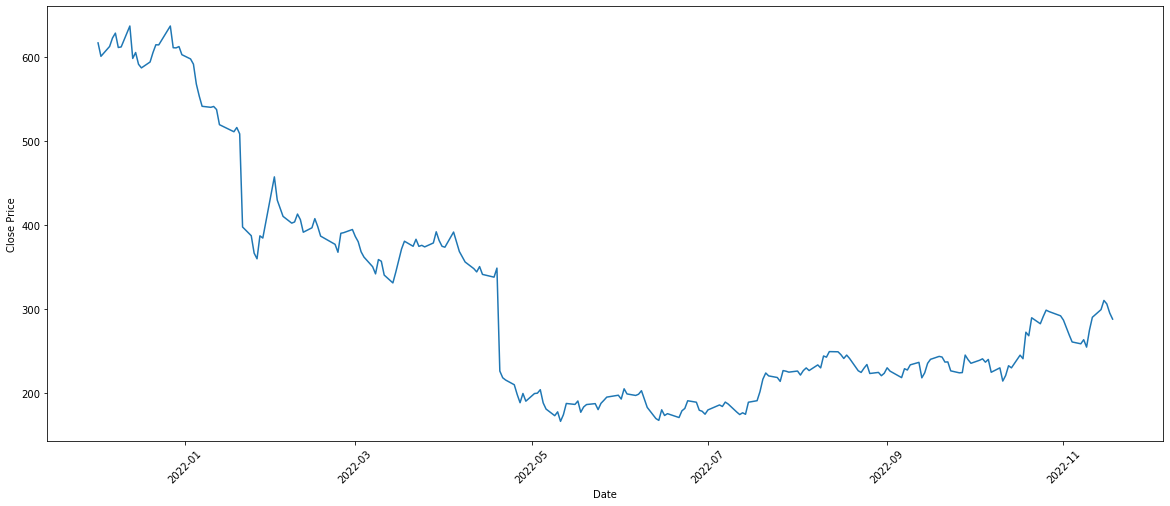

In [488]:
#Q1)Find the general trend of Netflix stock from the past 1 year using the graph for better understanding.

#Importing the matplotlib library to draw the stock graph
import matplotlib.pyplot as plt
%matplotlib inline

#Keeping the date on X-axis and price of Y-Axis
plt.figure(figsize=(20,8))
plt.plot('Date','Close',data=netflix_data)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [ ]:
#From the Graph, we can see that the Netflix stock is performing poorly from past 1 year. There was a sharp decrese 
#from january 2022 to May 2022, however, it managed to sustain a certain level but did not show a exponential increase 
#and is still below what it was last year.

In [354]:
#Q2) Calculate whether the Netflix stock ended on positive note or negative note each day for entire year.

#Here we are determing whether the Netflix stock ended on the higher side or lower side by comparing the closing price
#of current day with the closing price of past day. We will find the difference and if it is negative the stock ended on lower note
#than yesterday and if Change is positive, that means stock performed well on that day.

In [451]:
len(netflix_data)

239

In [489]:
#netflix_data.head(30)

#Creating an empty List Change and Change_per(to show percentage)
change = []
change_perc = []

#for loop to access each element in Close Column and performing subtraction with following element in same column 
#and storing in list
for i in range(len(netflix_data)-1):
    #print(i)
    change.append(((netflix_data.loc[i].at["Close"])-(netflix_data.loc[i+1].at["Close"])))
    change_perc.append(((netflix_data.loc[i].at["Close"])-(netflix_data.loc[i+1].at["Close"]))/(netflix_data.loc[i+1].at["Close"]) * 100)

#Creating a new column Change in the dataframe and appending the list to new Column.
netflix_data['Change'] = pd.Series(change)
netflix_data['Change%'] = pd.Series(change_perc)
netflix_data.head(50)

,Date,Open,High,Low,Close,Volume,Year,Month,Change,Change%
0,2022-11-18,297.33,298.00,287.00,287.98,8400157,2022,11,-7.30,-2.472230
1,2022-11-17,294.72,299.82,291.00,295.28,9806845,2022,11,-10.74,-3.509575
2,2022-11-16,309.94,310.49,303.61,306.02,8034157,2022,11,-4.18,-1.347518
3,2022-11-15,309.20,312.71,302.55,310.20,14609634,2022,11,10.93,3.652220
4,2022-11-14,290.00,311.00,288.19,299.27,17978520,2022,11,9.14,3.150312
5,2022-11-11,274.47,290.66,271.56,290.13,9573834,2022,11,15.16,5.513329
6,2022-11-10,265.99,275.36,260.09,274.97,9656846,2022,11,20.31,7.975340
7,2022-11-09,259.66,260.90,254.22,254.66,7259638,2022,11,-8.80,-3.340165
8,2022-11-08,259.92,266.08,256.88,263.46,7664379,2022,11,4.86,1.879350
9,2022-11-07,261.06,261.15,252.09,258.60,7919586,2022,11,-2.19,-0.839756


In [491]:
#Just to check if the last row has NAN values or not, means our output is correct.
netflix_data

,Date,Open,High,Low,Close,Volume,Year,Month,Change,Change%
0,2022-11-18,297.33,298.00,287.00,287.98,8400157,2022,11,-7.30,-2.472230
1,2022-11-17,294.72,299.82,291.00,295.28,9806845,2022,11,-10.74,-3.509575
2,2022-11-16,309.94,310.49,303.61,306.02,8034157,2022,11,-4.18,-1.347518
3,2022-11-15,309.20,312.71,302.55,310.20,14609634,2022,11,10.93,3.652220
4,2022-11-14,290.00,311.00,288.19,299.27,17978520,2022,11,9.14,3.150312
...,...,...,...,...,...,...,...,...,...,...
234,2021-12-08,630.00,632.46,623.20,628.08,2219191,2021,12,5.78,0.928812
235,2021-12-07,619.83,628.89,611.40,622.30,3124069,2021,12,10.06,1.643146
236,2021-12-06,606.01,617.29,601.00,612.24,3088557,2021,12,11.73,1.953340
237,2021-12-03,622.75,625.50,594.00,600.51,4829388,2021,12,-15.96,-2.588934


In [492]:
#Q3) Calculate which month had the highest Volume in year 2022 and display the month with highest Volume at the top.

#Here, I grouped the data by Year first and then column and did the sum on 
#the Volumes in that particular month and displayed in descending order.

new_df = netflix_data[(netflix_data['Year'] == 2022)].groupby(["Year","Month"])['Volume'].sum().round()


In [455]:
#Performed the sorting operation on the new dataframe and stored it in df2
df2 = pd.DataFrame(new_df.sort_values(ascending = False)) 
#Creating a dataframe and sorting the values in descending order
#as we want the highest sales on top.
df2

#Thus, from the output we can see that the Month of April had the highest Volume, that means, 
#in april highest number of people buy and sell their stocks and March had the least Volume.

Volume
Year Month           
2022 4      402659233
     10     334995542
     7      269822754
     5      251312023
     9      234027327
     1      212832632
     6      192524084
     8      152215920
     2      134572119
     11     125987147
     3      119454644

In [493]:
#Q4)Find out which month performed the worst in last 12 months(ie Dec 2021 - Present), 

#Here, we are analyzing how many days in particular month does the stock performed bad on ended in Red. To acheieve this,
#I utilized the dataframe created in Q2 and used the change columne. 
#We are finding the count of all the days in each month where the stock ended in Red or had 'change' value as negative.
#this will show us which month was bad for Netflix stock.

#Checking the datatype of Change column before proceeding.
netflix_data['Change']

0      -7.30
1     -10.74
2      -4.18
3      10.93
4       9.14
       ...  
234     5.78
235    10.06
236    11.73
237   -15.96
238      NaN
Name: Change, Length: 239, dtype: float64

In [494]:
limit = 0.00

#Primarily, grouping the Month column so that we can get the data month wise and checking if netflix_data['Change'] < limit,
#ie if every row in Change column is less than 0 or not.
new_fd = netflix_data[netflix_data['Change'] < limit].groupby(['Month'])['Change'].count()

#Created a new dataframe and appended the values and performed sorting function.
df3 = pd.DataFrame(new_fd.sort_values(ascending = False))
df3

,Change
Month,
4,16
1,15
3,14
6,13
8,12
7,10
9,10
10,10
2,9
